In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

## Data Analysis of auto-mpg Data Set

## Data Cleaning

In [188]:
train = pd.read_csv('auto-mpg.csv')

In [189]:
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [190]:
train.shape

(398, 9)

array([[<AxesSubplot:title={'center':'origin'}>]], dtype=object)

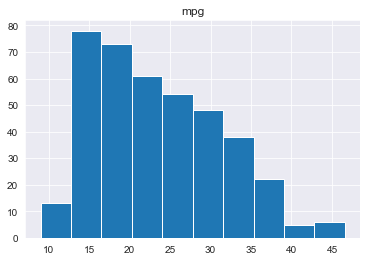

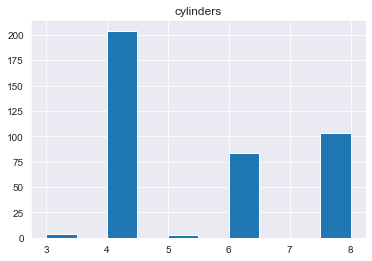

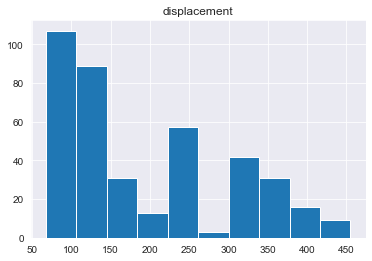

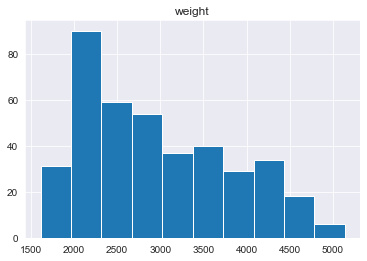

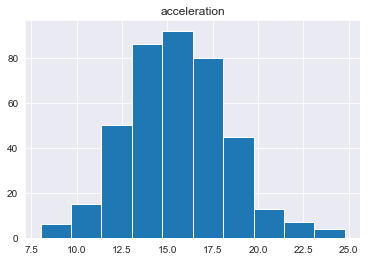

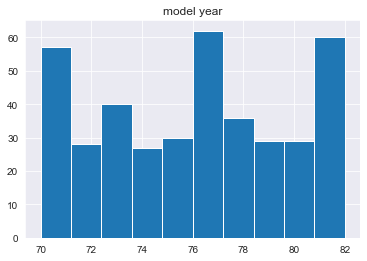

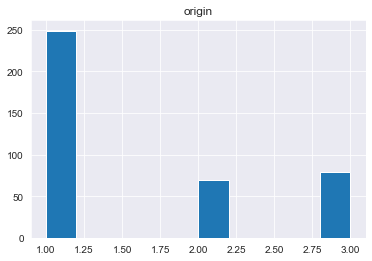

In [191]:
train.hist('mpg')
train.hist('cylinders')
train.hist('displacement')
train.hist('weight')
train.hist('acceleration')
train.hist('model year')
train.hist('origin')




<Figure size 432x288 with 0 Axes>

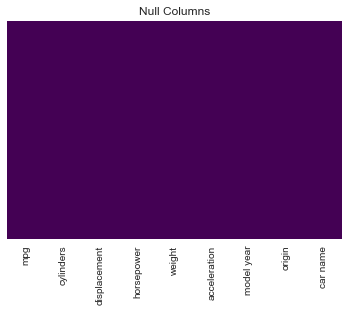

<Figure size 432x288 with 0 Axes>

In [192]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Null Columns')
plt.figure()

In [193]:
train.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [194]:
def check_numeric(column):
    try:
        train[column] = pd.to_numeric(train[column], errors='raise')
    except:
        print('Non numeric values exist in {}'.format(column))

In [195]:
check_numeric('mpg')
check_numeric('cylinders')
check_numeric('displacement')
check_numeric('horsepower')
check_numeric('weight')
check_numeric('acceleration')
check_numeric('model year')
check_numeric('origin')

Non numeric values exist in horsepower


In [196]:
train[train['horsepower'].apply(lambda x: not x.isnumeric())]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [197]:
mode = train['horsepower'].mode()[0]
train['horsepower'] = train['horsepower'].apply(lambda hp: hp.replace('?', mode) if '?' in hp else hp)
train['horsepower'] = train['horsepower'].apply(lambda hp: float(hp))

In [198]:
check_numeric('horsepower')

In [199]:
train[train['horsepower'].apply(lambda x: not str(x).isnumeric())]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


array([[<AxesSubplot:title={'center':'horsepower'}>]], dtype=object)

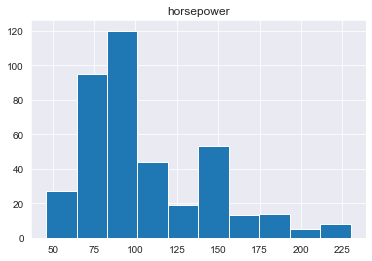

In [200]:
train.hist('horsepower')

In [201]:
train['origin'] = train['origin'].replace([1,2,3], ['USA', 'Europe', 'Japan'])

In [202]:
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [204]:
# as we are done with the basic stuff, now let's get to dividing the data into numeric and cateogrical data for further analysis

categories = list(train.select_dtypes(include=['object']))
numerics = list(train.select_dtypes(exclude=['object']))   

print('Categories are: {}'.format(categories))
print('Numerics are: {}'.format(numerics))

Categories are: ['origin', 'car name']
Numerics are: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


In [205]:
# let's have a look at the unique values in each column

train.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [206]:
# since the cylinders and model year columns have very few numerics, let's take them as categorical

categories.extend(['cylinders', 'model year'])
numerics.remove('cylinders')
numerics.remove('model year')

print('Categories are: {}'.format(categories))
print('Numerics are: {}'.format(numerics))

Categories are: ['origin', 'car name', 'cylinders', 'model year']
Numerics are: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [207]:
# let's see if any row was repeated

print('Duplicated rows are:', train.duplicated().sum())

Duplicated rows are: 0


In [208]:
# let's now put both types of data next to one another instead of having other data types between them

train = pd.concat((train[categories], train[numerics]), axis=1)
train.head()

,origin,car name,cylinders,model year,mpg,displacement,horsepower,weight,acceleration
0,USA,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,USA,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,USA,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,USA,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,USA,ford torino,8,70,17.0,302.0,140.0,3449,10.5


In [209]:
# let's save this dataframe as a cleaned up csv file
train.to_csv('auto-mpg-cleaned.csv')

## Categorical Features' Analysis 

In [210]:
# first let's start off by working on extracting the cateogrical columns from our cleaned dataframe

train_categorized = train.loc[:, 'origin': 'model year']
train_categorized.head()

,origin,car name,cylinders,model year
0,USA,chevrolet chevelle malibu,8,70
1,USA,buick skylark 320,8,70
2,USA,plymouth satellite,8,70
3,USA,amc rebel sst,8,70
4,USA,ford torino,8,70


In [211]:
# now we get rid of any spaces that may have been part of origin or car name 
train_categorized['origin'] = train_categorized['origin'].replace(' ', '')

In [212]:
print(train['mpg'].max())
print(train['mpg'].min())

46.6
9.0


In [213]:
# let's play around by categorizing the mpg into low, medium and high levels
train_categorized['mpg level'] = train['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
categories.append('mpg level')
print('Categorical variables are: {}'.format(categories))

Categorical variables are: ['origin', 'car name', 'cylinders', 'model year', 'mpg level']


In [214]:
# now let's have a look at the different values in our categories of interest
print('Categories in origin: {}'.format(train_categorized.origin.unique()))
# NO NEED TO PRINT THIS AS THERE ARE
# TOO MANY TYPES OF CARS, print('Categories in car name: {}'.format(train_categorized['car name'].unique()))
print('Categories in cylinders: {}'.format(train_categorized.cylinders.unique()))
print('Categories in model year: {}'.format(train_categorized['model year'].unique()))

Categories in origin: ['USA' 'Japan' 'Europe']
Categories in cylinders: [8 4 6 3 5]
Categories in model year: [70 71 72 73 74 75 76 77 78 79 80 81 82]


In [215]:
train_categorized.describe()

,cylinders,model year
count,398.000000,398.000000
mean,5.454774,76.010050
std,1.701004,3.697627
min,3.000000,70.000000
25%,4.000000,73.000000
50%,4.000000,76.000000
75%,8.000000,79.000000
max,8.000000,82.000000


## Categorical Distribution Analysis

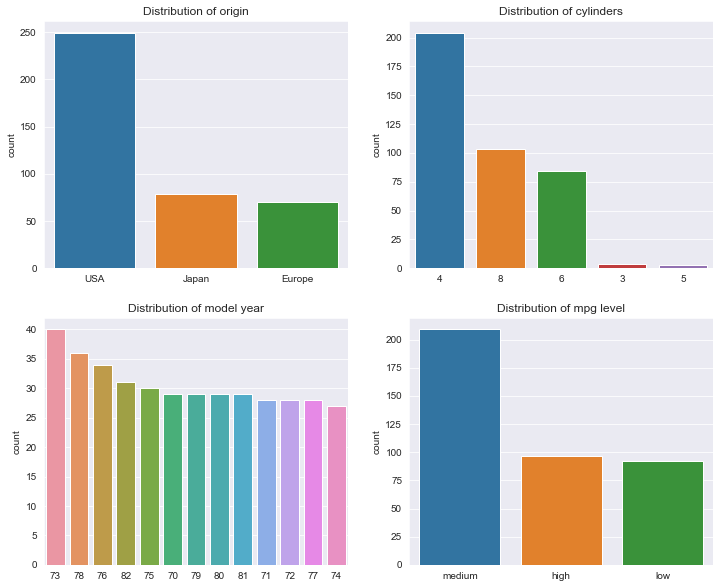

In [216]:
fig = plt.figure(1, (12, 10))
for i,category in enumerate(train_categorized.drop(['car name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.set_style('darkgrid')
    sns.countplot(x=category, data=train_categorized, order=train_categorized[category].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {category}')
plt.show()

In [217]:
# calculate proportion of dominant classes in each category
number_of_rows, number_of_columns = train.shape
for i,category in enumerate(train_categorized.drop(['car name'], axis=1).columns):
    # counting the different types in the different categories
    val_counts = train_categorized[category].value_counts()
    # since the greatest count type comes on top of the series, simply retrieving it's count value
    dominant_frac = val_counts.iloc[0] / number_of_rows
    # retrieving the index the row label of the 0th index (highest count type) and printing
    print(f'{val_counts.index[0]} alone contributes to {round(dominant_frac * 100, 1)}% of {category}')

USA alone contributes to 62.6% of origin
4 alone contributes to 51.3% of cylinders
73 alone contributes to 10.1% of model year
medium alone contributes to 52.5% of mpg level


In [218]:
# the car name column had many categories, hence we left it alone before, now we can analyze it
print('Categories in car name: {}'.format(train_categorized['car name'].unique()))

Categories in car name: ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota cor

In [219]:
print('Number of categories in car name: {}'.format(train_categorized['car name'].nunique()))

Number of categories in car name: 305


In [220]:
# too many categories for us to want to analyze, but we could cateogrize them according to company name
# extract car company from car name
train_categorized['car company'] = train_categorized['car name'].apply(lambda x: x.split()[0])
                                                            
# remove car company from car name and rename to car name only
train_categorized['car name only'] = train_categorized['car name'].apply(lambda x: ' '.join(x.split()[1:]))
train_categorized.drop('car name', axis=1, inplace=True)
categories.extend(['car company', 'car name only'])

categories.remove('car name')

print(f'categorical variables: {categories}')
train_categorized.head()

categorical variables: ['origin', 'cylinders', 'model year', 'mpg level', 'car company', 'car name only']


,origin,cylinders,model year,mpg level,car company,car name only
0,USA,8,70,medium,chevrolet,chevelle malibu
1,USA,8,70,low,buick,skylark 320
2,USA,8,70,medium,plymouth,satellite
3,USA,8,70,low,amc,rebel sst
4,USA,8,70,medium,ford,torino


In [221]:
# now let's see the unique categories in the car company name

print('The unique categories in car company: \n{}\n'.format(train_categorized['car company'].unique()))
print('The number of unique values in car company (unique company names) is: {}'
      .format(train_categorized['car company'].nunique()))

The unique categories in car company: 
['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']

The number of unique values in car company (unique company names) is: 37


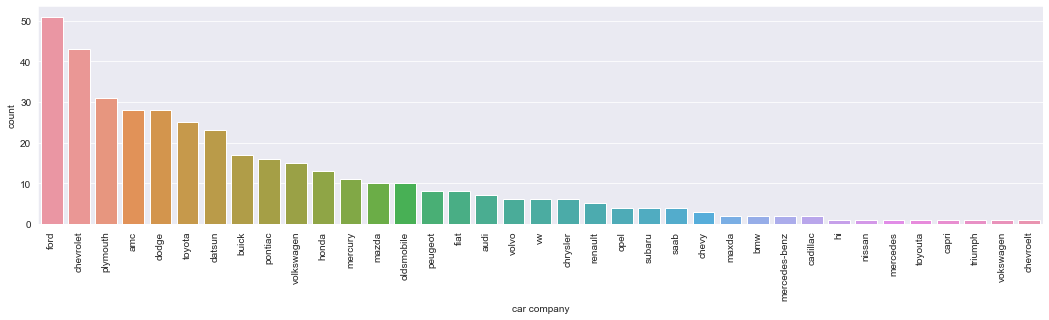

In [222]:
# seeing how many cars belong to each company in our 'car company column'
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(x=train_categorized['car company'], order=train_categorized['car company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.show()

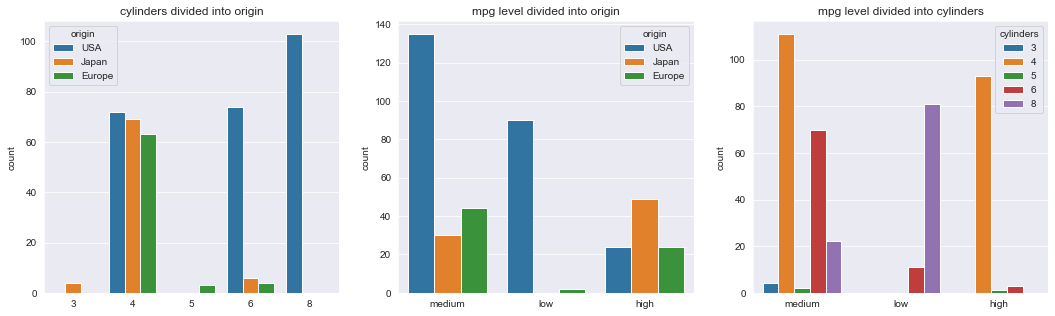

In [223]:
# now that we've seen that almost all of our categories have non uniform distribution, let's shift our focus to see how
# the different categories relate to each other

import itertools

# creating the combinations without replacement for the columns that have shown variance and are of interest
combos = itertools.combinations(['origin', 'cylinders', 'mpg level'], 2)

# print(list(combos))
# [('origin', 'cylinders'), ('origin', 'mpg level'), ('cylinders', 'mpg level')]

fig = plt.figure(1, (18, 5))

i = 0
for pair in combos:
    i = i+1
    ax = plt.subplot(1,3,i)
    sns.set_style('darkgrid')
    # taking pair[0] as the x axis, counts as the y axis, pair[1] as the hue (which decides the way the data is split)
    sns.countplot(x=pair[1], hue=pair[0], data=train_categorized)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} divided into {pair[0]}')

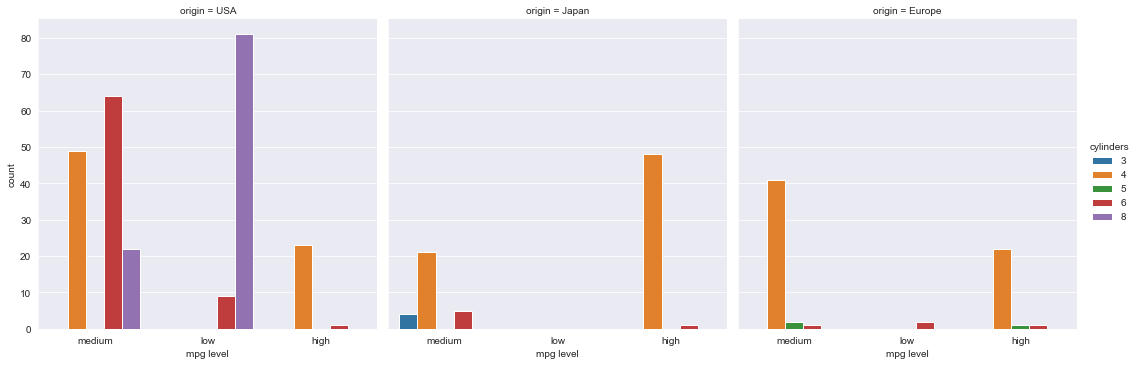

In [224]:
# we can see from above how many cylinders belong to which origin and why etc

# let's also see the mpg levels divided into columns by cylinders
sns.catplot(x='mpg level', hue='cylinders', col='origin', data=train_categorized, kind='count')
plt.show()

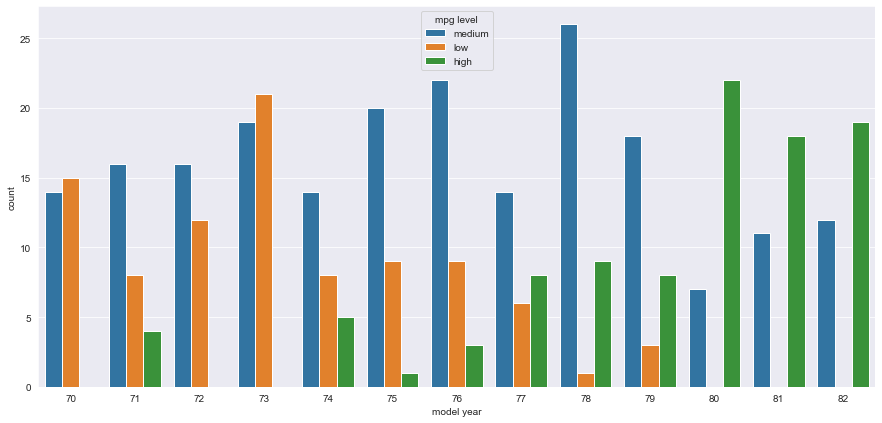

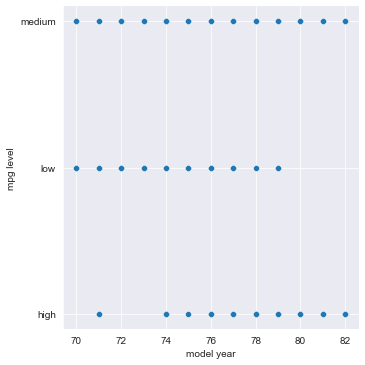

In [225]:
# now let's come to model year
# we're seeing the way mpg level has increaed or decreased or neither with respect to model year
plt.figure(figsize = (15,7))
sns.countplot(x='model year', hue='mpg level', data=train_categorized)
sns.relplot(x='model year', y='mpg level', data=train_categorized)
plt.show()

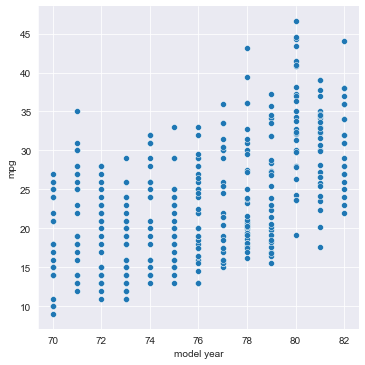

In [226]:
sns.relplot(x='model year', y='mpg', data=train)
# notice the use of train instead of train_categorized
plt.show()

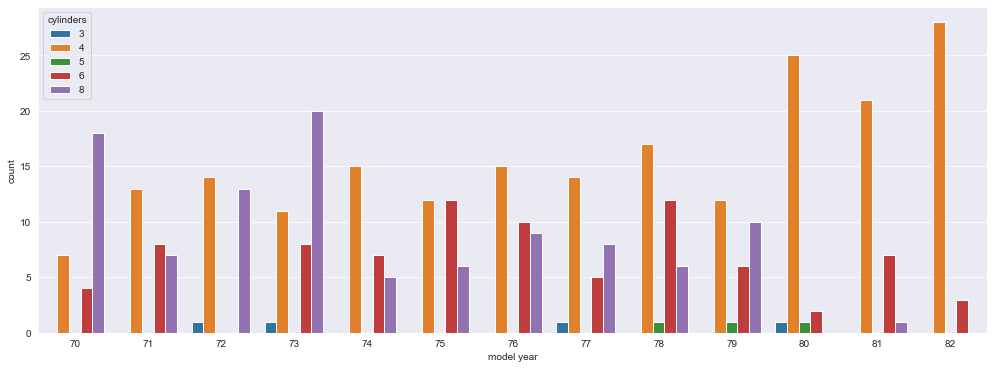

In [227]:
# we can see that model year split by mpg level and the scatterplot of model year vs mpg both show that the mpg level is
# increasing with the newer models, the scatterplot of model year vs mpg does not show anything conclusive

# we're seeing the way cylinders has increaed or decreased or neither with respect to model year
plt.figure(figsize = (17,6))
sns.countplot(x='model year', hue='cylinders', data=train_categorized)
# useless: sns.relplot(x='model year', y='cylinders', data=train_categorized)
plt.show()

<AxesSubplot:xlabel='model year', ylabel='count'>

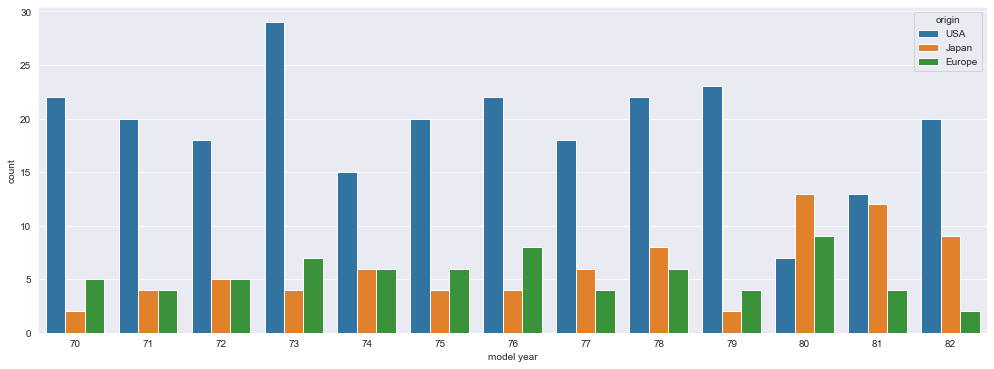

In [228]:
# we're seeing the way origin has increaed or decreased or neither with respect to model year
plt.figure(figsize = (17,6))
sns.countplot(x='model year', hue='origin', data=train_categorized)

In [229]:
# obviously, how can we proceed further, if we do not see the relationship between company name and manufacturing
# let's have a look at the top car companies

top_companies = train_categorized['car company'].value_counts().index[0:15]
print(top_companies)

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'peugeot'],
      dtype='object')


In [230]:
train_top_companies = train_categorized[train_categorized['car company'].isin(top_companies)]
train_top_companies.shape

# most cars are in the top 15 companies, nice!

(329, 6)

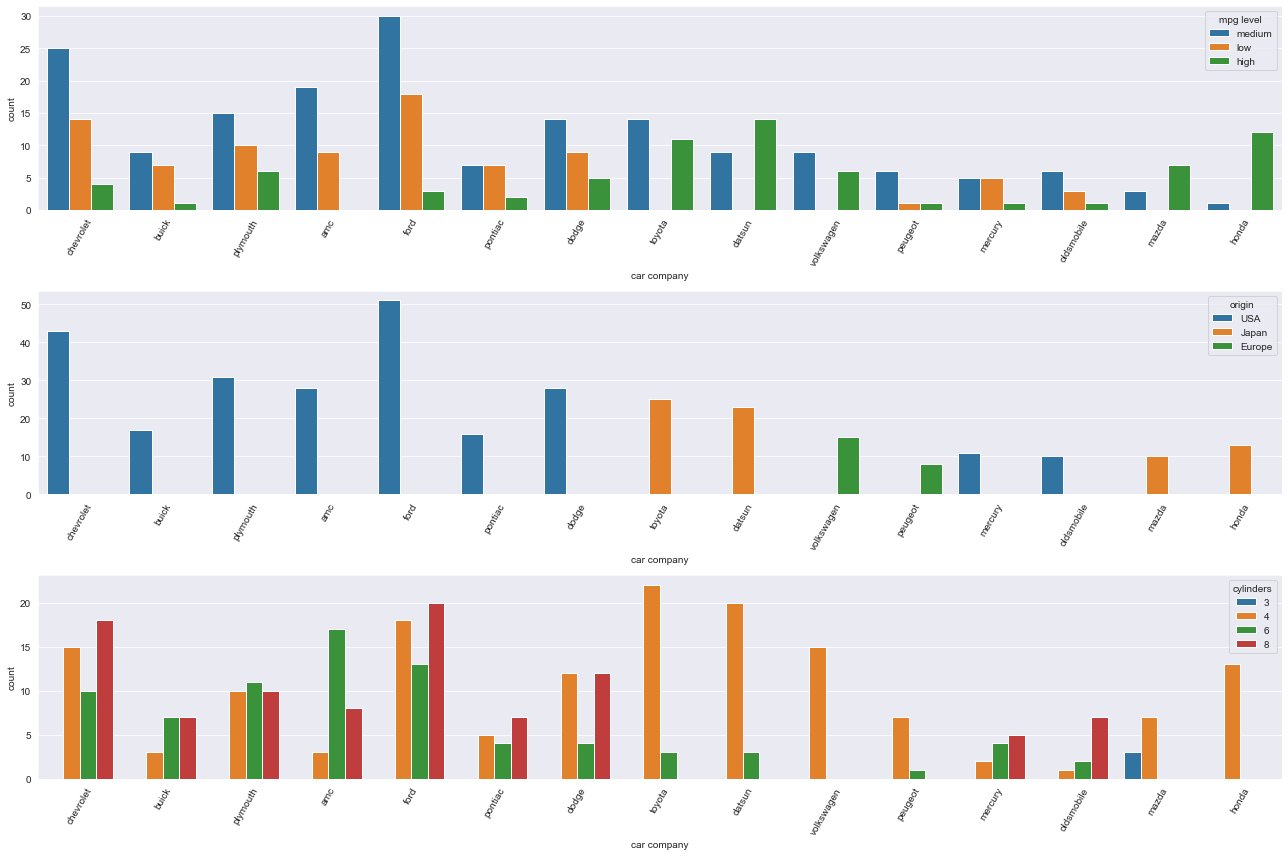

In [231]:
# let's have a look at the relationship between car name and origin, cylinders and model year, mpg level
fig = plt.figure(1, (18,12))

for i,category in enumerate(['mpg level', 'origin', 'cylinders']):
    ax = plt.subplot(3,1,i+1)
    sns.set_style('darkgrid')
    sns.countplot(x='car company', hue=category, data=train_top_companies)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    plt.tight_layout()
  

In [232]:
train = pd.concat((train_categorized.loc[:, 'origin': 'car company'], train[numerics]), axis=1)
train.head()

,origin,cylinders,model year,mpg level,car company,mpg,displacement,horsepower,weight,acceleration
0,USA,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,USA,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,USA,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,USA,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,USA,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [233]:
# let's save this dataframe as an csv file
train.to_csv('auto-mpg-updated.csv')

## Numeric Features' Analysis 

In [234]:
# firstly, let's get reminded as to what the numeric features were
print(f'numerical variables:  {numerics}')

numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [235]:
# let's now extract the numeric categories and work on them, then later put them back in the original dataframe
train_numerics = train[numerics]
train_numerics.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


In [236]:
# check out the desrciptive statistics
train_numerics.describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,105.155779,2970.424623,15.568090
std,7.815984,104.269838,38.600986,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,95.000000,2803.500000,15.500000
75%,29.000000,262.000000,130.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


## Numerical Distribution Analysis

5
mpg
displacement
horsepower
weight
acceleration


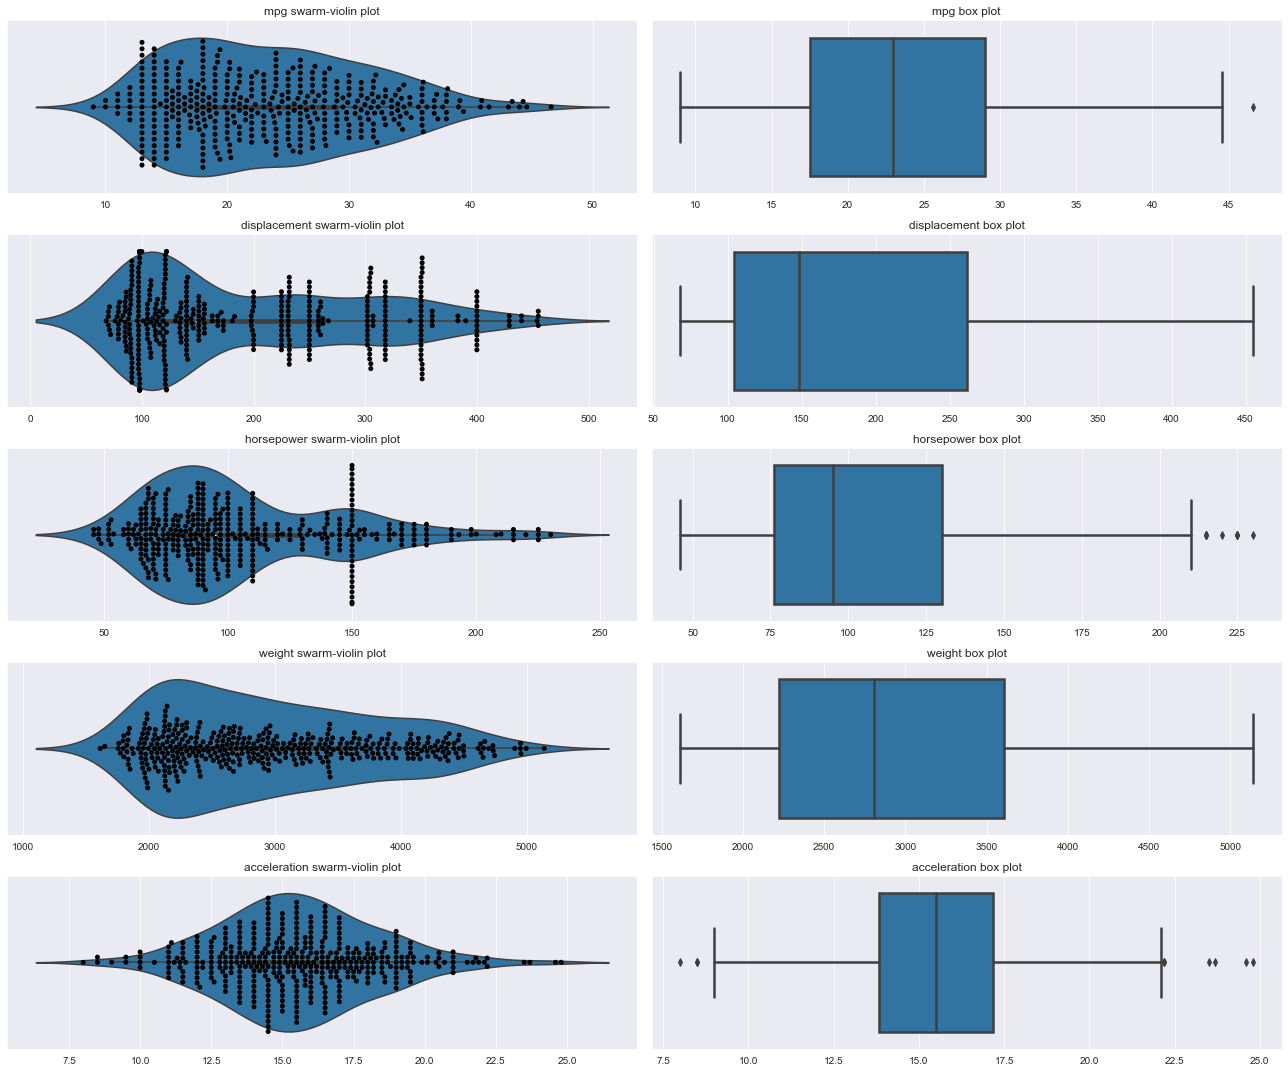

In [237]:
# let's view the distributions of all the numeric features as distribution plots, violin plots and box plots

rows = len(numerics)
print(rows)
columns = 2

fig = plt.figure(1, (18, rows*3))

i = 0
for column in numerics:
    print(column)
    
    # plotting using subplot and displot was just creating too many issues
    
    i += 1
    ax2 = plt.subplot(rows, columns,i)
    sns.violinplot(x=train_numerics[column])
    sns.swarmplot(x=train_numerics[column], size=5, color='k')
    ax2.set_xlabel(None)
    ax2.set_title(f'{column} swarm-violin plot')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, columns,i)
    sns.boxplot(x=train_numerics[column], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{column} box plot')
    plt.tight_layout()

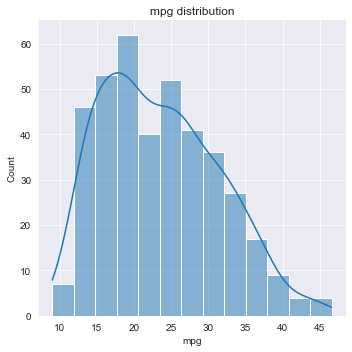

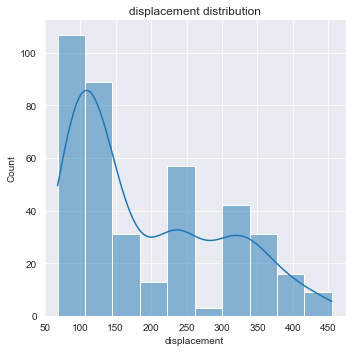

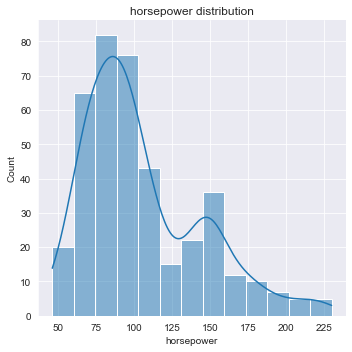

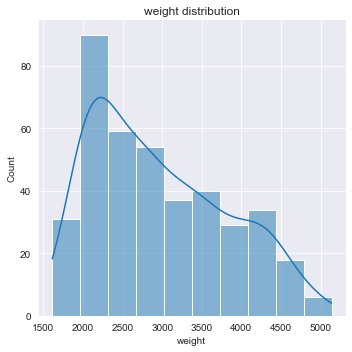

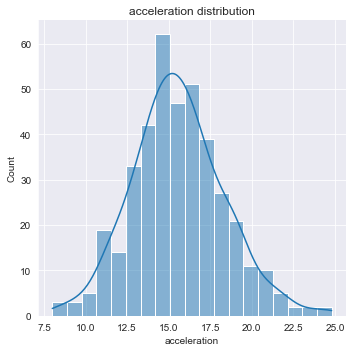

In [238]:
i = 0
for column in numerics:
    i += 1
    sns.displot(x=train_numerics[column], kde=True)
    plt.title((f'{column} distribution'))
    plt.tight_layout()

In [239]:
# let's check out some of Tukey's outliers in our numeric features
import numpy as np
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [240]:
for column in numerics:
    outliers = tukey_outliers(train_numerics[column])
    if len(outliers):
        print(f"{column} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"{column} doesn't have any tukey outliers.\n")

mpg has these tukey outliers,
322    46.6
Name: mpg, dtype: float64

displacement doesn't have any tukey outliers.

horsepower has these tukey outliers,
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
94     215.0
95     225.0
116    230.0
Name: horsepower, dtype: float64

weight doesn't have any tukey outliers.

acceleration has these tukey outliers,
7       8.5
9       8.5
11      8.0
59     23.5
195    22.2
299    24.8
300    22.2
326    23.7
394    24.6
Name: acceleration, dtype: float64



In [241]:
# The above outliers correspond perfectly with our boxplots made previously
# Now let's have a look at them in our dataframe

train.iloc[(tukey_outliers(train_numerics['mpg']).index)]

,origin,cylinders,model year,mpg level,car company,mpg,displacement,horsepower,weight,acceleration
322,Japan,4,80,high,mazda,46.6,86.0,65.0,2110,17.9


In [242]:
train.iloc[(tukey_outliers(train_numerics['horsepower']).index)]

,origin,cylinders,model year,mpg level,car company,mpg,displacement,horsepower,weight,acceleration
6,USA,8,70,low,chevrolet,14.0,454.0,220.0,4354,9.0
7,USA,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
8,USA,8,70,low,pontiac,14.0,455.0,225.0,4425,10.0
13,USA,8,70,low,buick,14.0,455.0,225.0,3086,10.0
25,USA,8,70,low,ford,10.0,360.0,215.0,4615,14.0
94,USA,8,73,low,chrysler,13.0,440.0,215.0,4735,11.0
95,USA,8,73,low,buick,12.0,455.0,225.0,4951,11.0
116,USA,8,73,low,pontiac,16.0,400.0,230.0,4278,9.5


In [243]:
train.iloc[(tukey_outliers(train_numerics['acceleration']).index)]

,origin,cylinders,model year,mpg level,car company,mpg,displacement,horsepower,weight,acceleration
7,USA,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
9,USA,8,70,low,amc,15.0,390.0,190.0,3850,8.5
11,USA,8,70,low,plymouth,14.0,340.0,160.0,3609,8.0
59,Europe,4,72,medium,volkswagen,23.0,97.0,54.0,2254,23.5
195,USA,4,76,medium,chevrolet,29.0,85.0,52.0,2035,22.2
299,Europe,4,79,medium,peugeot,27.2,141.0,71.0,3190,24.8
300,USA,8,79,medium,oldsmobile,23.9,260.0,90.0,3420,22.2
326,Europe,4,80,high,vw,43.4,90.0,48.0,2335,23.7
394,Europe,4,82,high,vw,44.0,97.0,52.0,2130,24.6


In [244]:
# from the above we can either come to conclusions as to why the outliers are there or not

     Numerical Features  Box Plot Values
0                   mpg             18.0
1                   mpg             15.0
2                   mpg             18.0
3                   mpg             16.0
4                   mpg             17.0
...                 ...              ...
1985       acceleration             15.6
1986       acceleration             24.6
1987       acceleration             11.6
1988       acceleration             18.6
1989       acceleration             19.4

[1990 rows x 2 columns]


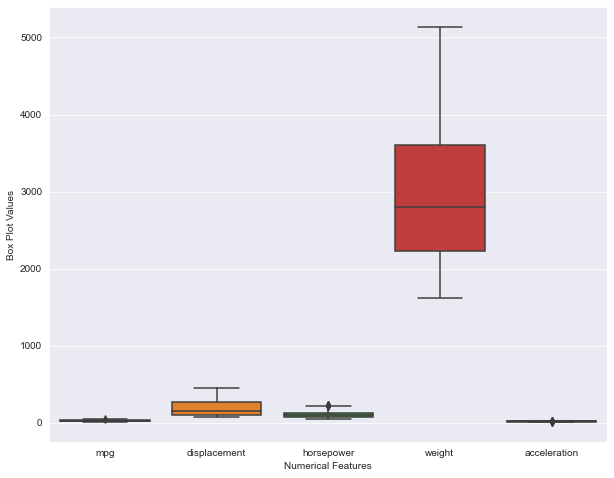

In [245]:
# Our data is not scaled properly, we need to scale it for modelling, however we get the jist of it here
plt.figure(figsize=(10,8))
d = pd.melt(train_numerics, var_name="Numerical Features", value_name="Box Plot Values")
print(d)
sns.boxplot(x="Numerical Features", y="Box Plot Values", data=d)
plt.show()

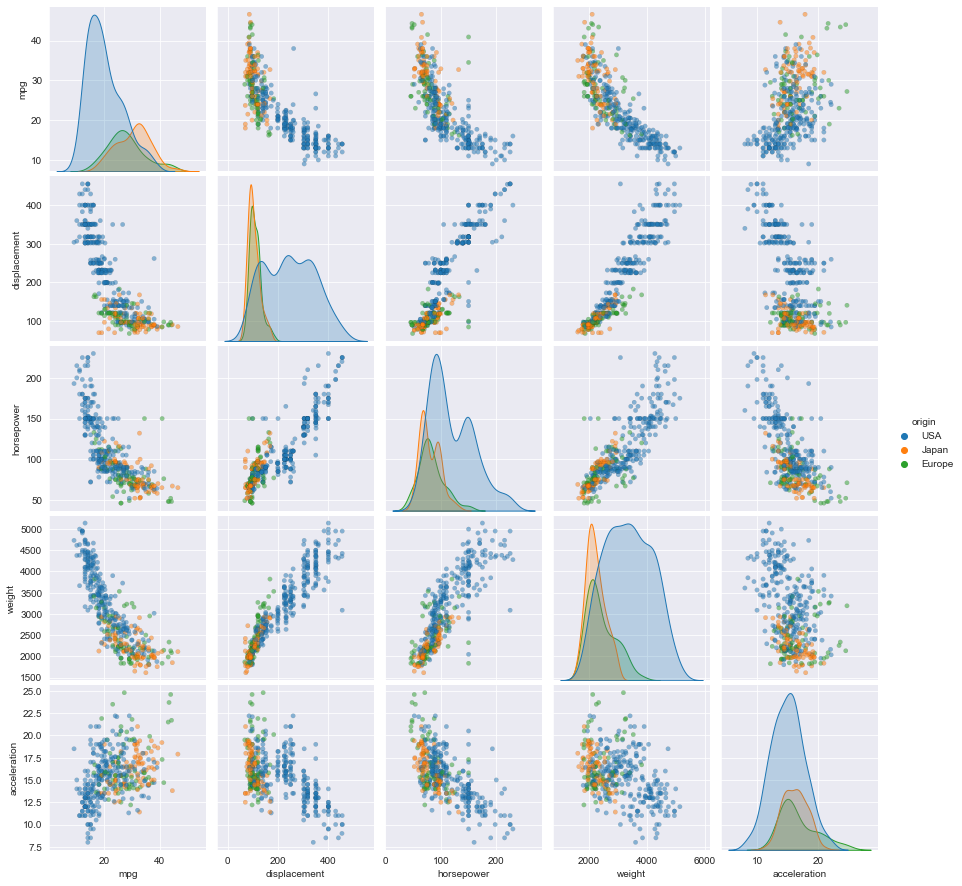

In [246]:
# Now just as we did for the categorical features, let's have a look at the numeric features' relationship with one another

sns.pairplot(data=train, vars=numerics, diag_kind='kde', hue='origin',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

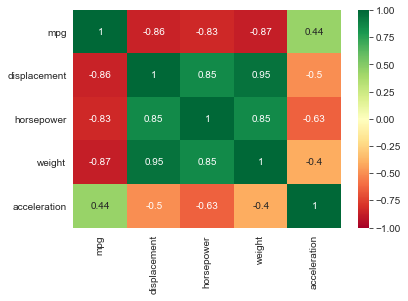

In [247]:
sns.heatmap(data=train_numerics.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'RdYlGn')
plt.show()

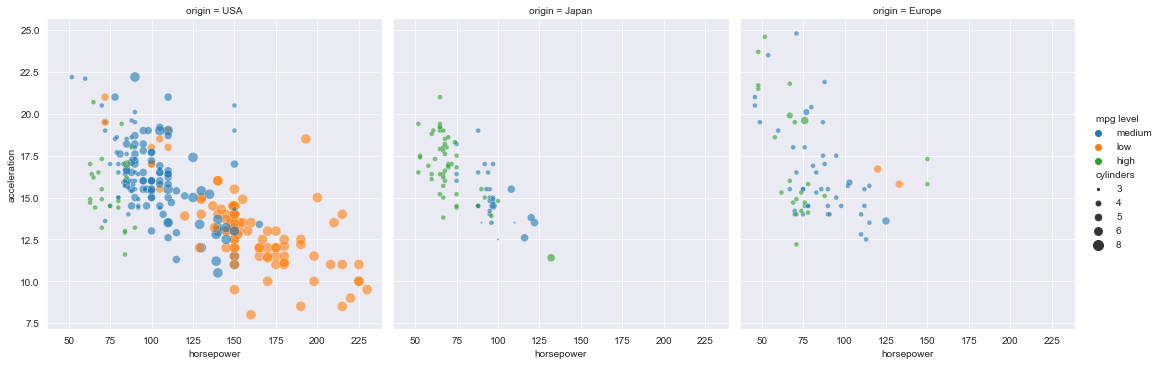

In [248]:
# let's now have a look at between acceleration and horsepower split by origin and differed by mpg level and cylinders

sns.relplot(x='horsepower', y='acceleration', hue='mpg level', #style='mpg level',
            size='cylinders', col='origin', data=train, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

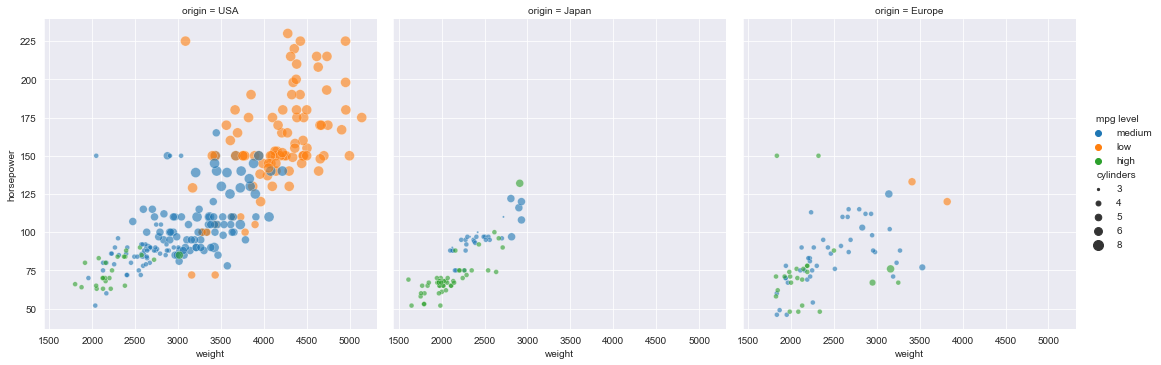

In [249]:
sns.relplot(x='weight', y='horsepower', hue='mpg level', #style='mpg level',
            size='cylinders', col='origin', data=train, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

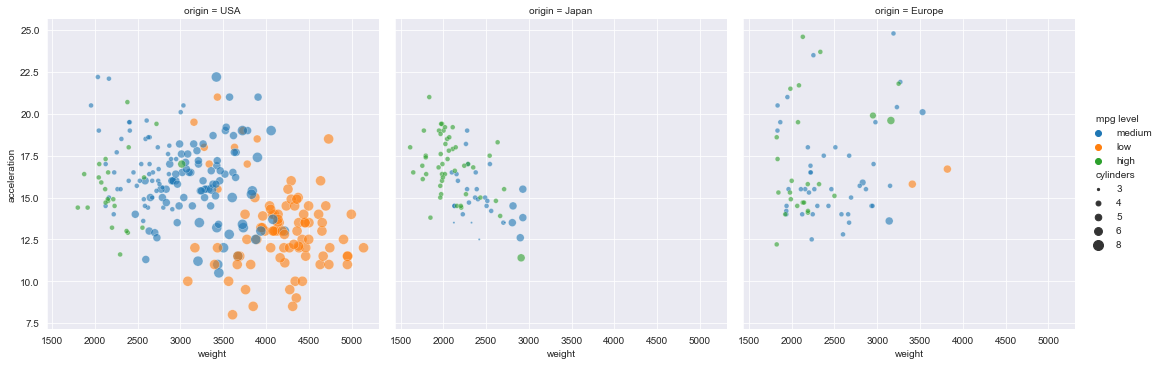

In [250]:
sns.relplot(x='weight', y='acceleration', hue='mpg level', #style='mpg level',
            size='cylinders', col='origin', data=train, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

## Categorical and Numerical Features' Relationship

Relationship between Origin and Numerical Features


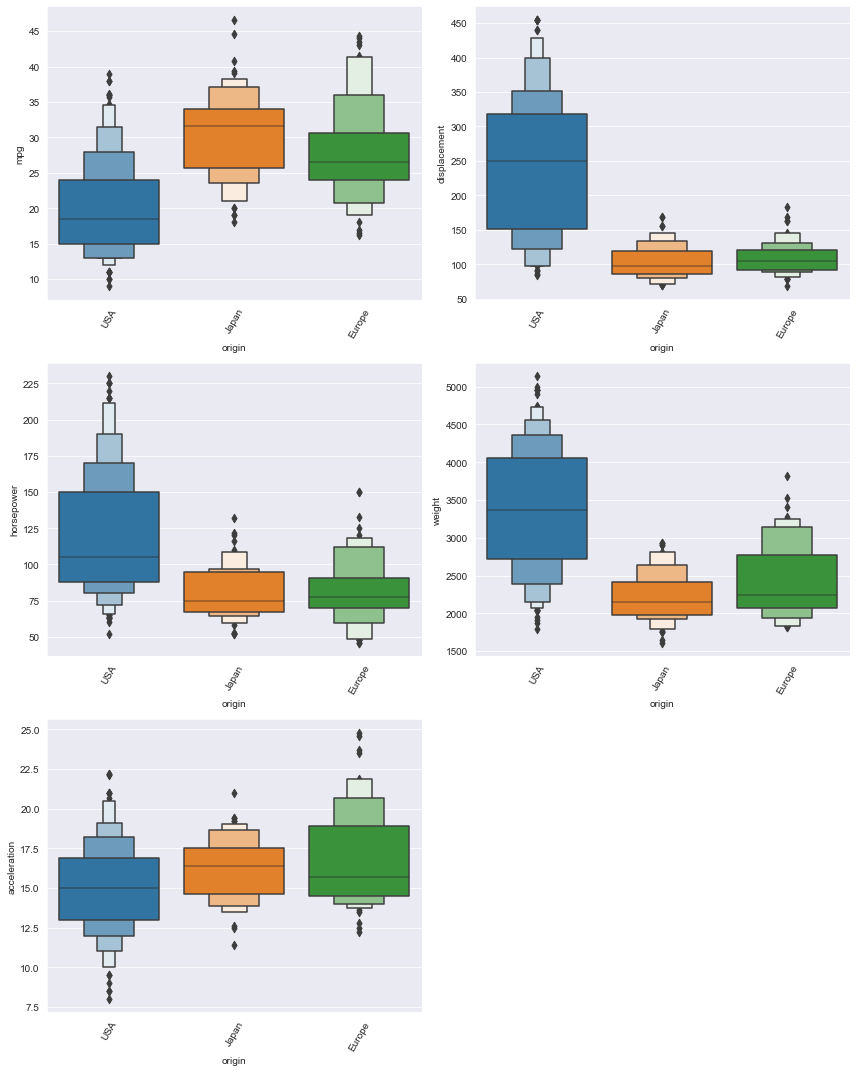

In [251]:

print('Relationship between Origin and Numerical Features')
fig = plt.figure(1, (12,15))

for i,category in enumerate(numerics):
    ax = plt.subplot(3,2,i+1)
    sns.boxenplot(x='origin', y=category, data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    plt.tight_layout()

Relationship between MPG Levels and Numerical Features


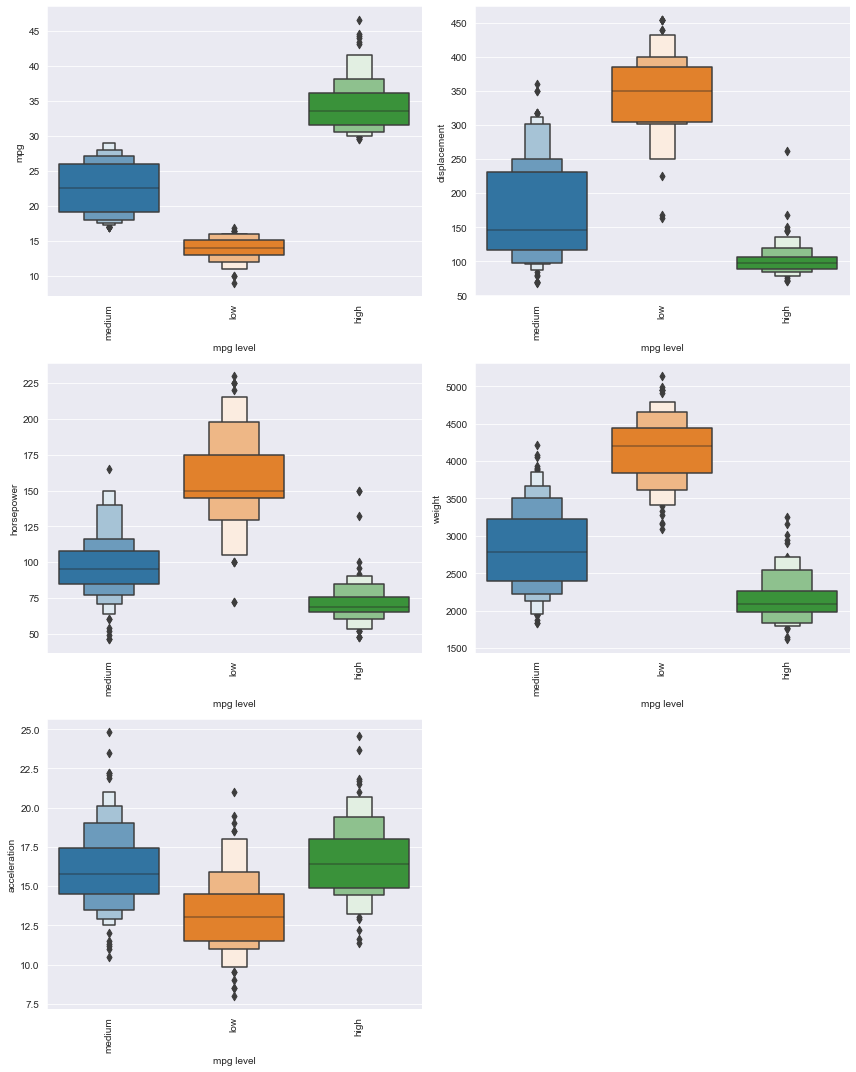

In [252]:

print('Relationship between MPG Levels and Numerical Features')
fig = plt.figure(1, (12,15))

for i,category in enumerate(numerics):
    ax = plt.subplot(3,2,i+1)
    sns.boxenplot(x='mpg level', y=category, data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()

Relationship between Cylinders and Numerical Features


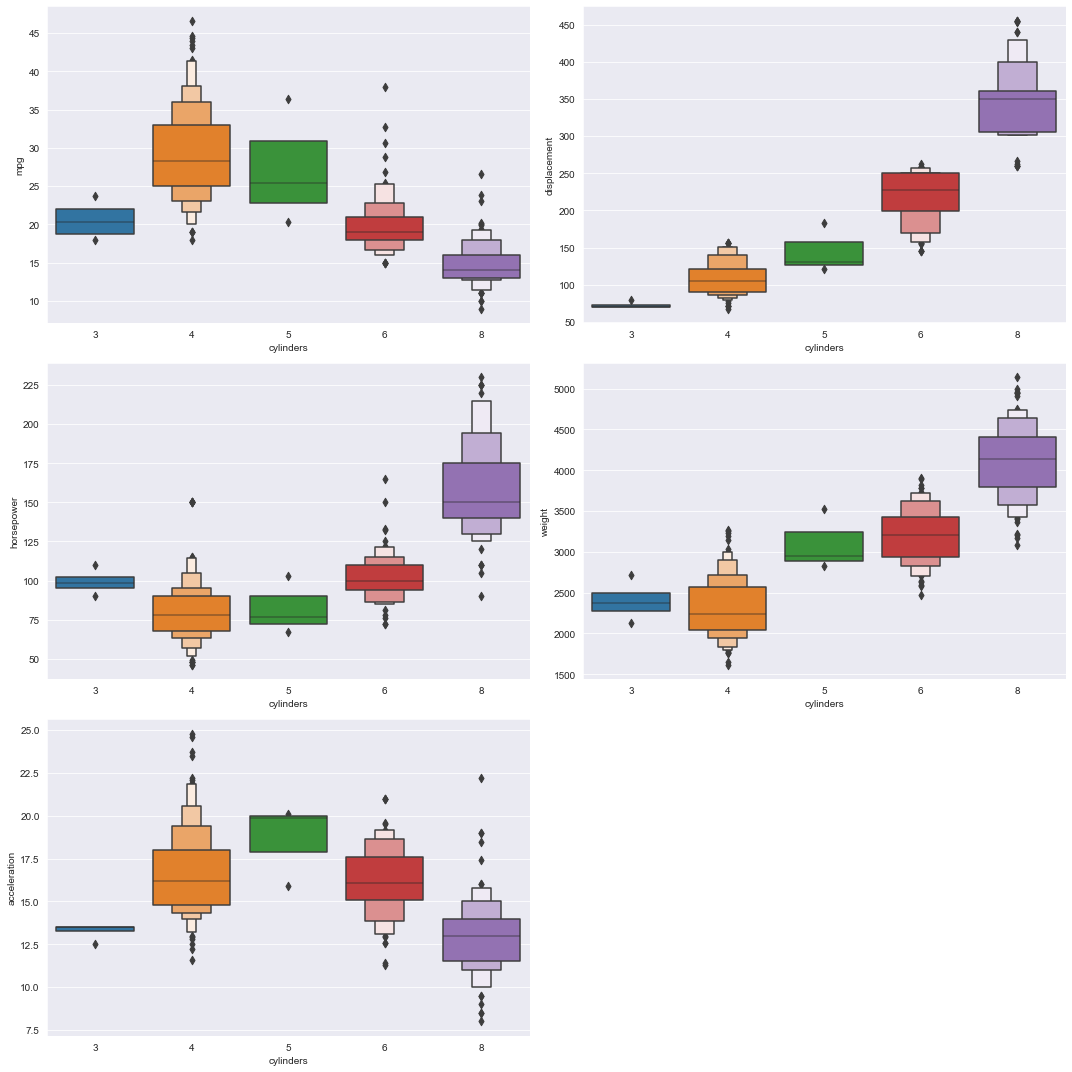

In [264]:

print('Relationship between Cylinders and Numerical Features')
fig = plt.figure(1, (15,15))

for i,category in enumerate(numerics):
    ax = plt.subplot(3,2,i+1)
    sns.boxenplot(x='cylinders', y=category, data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()

In [254]:
# These plots can easily be used to identify the patterns between the types in the Categorical Features and Numerical Data

Relationship between Model Year and Numerical Features


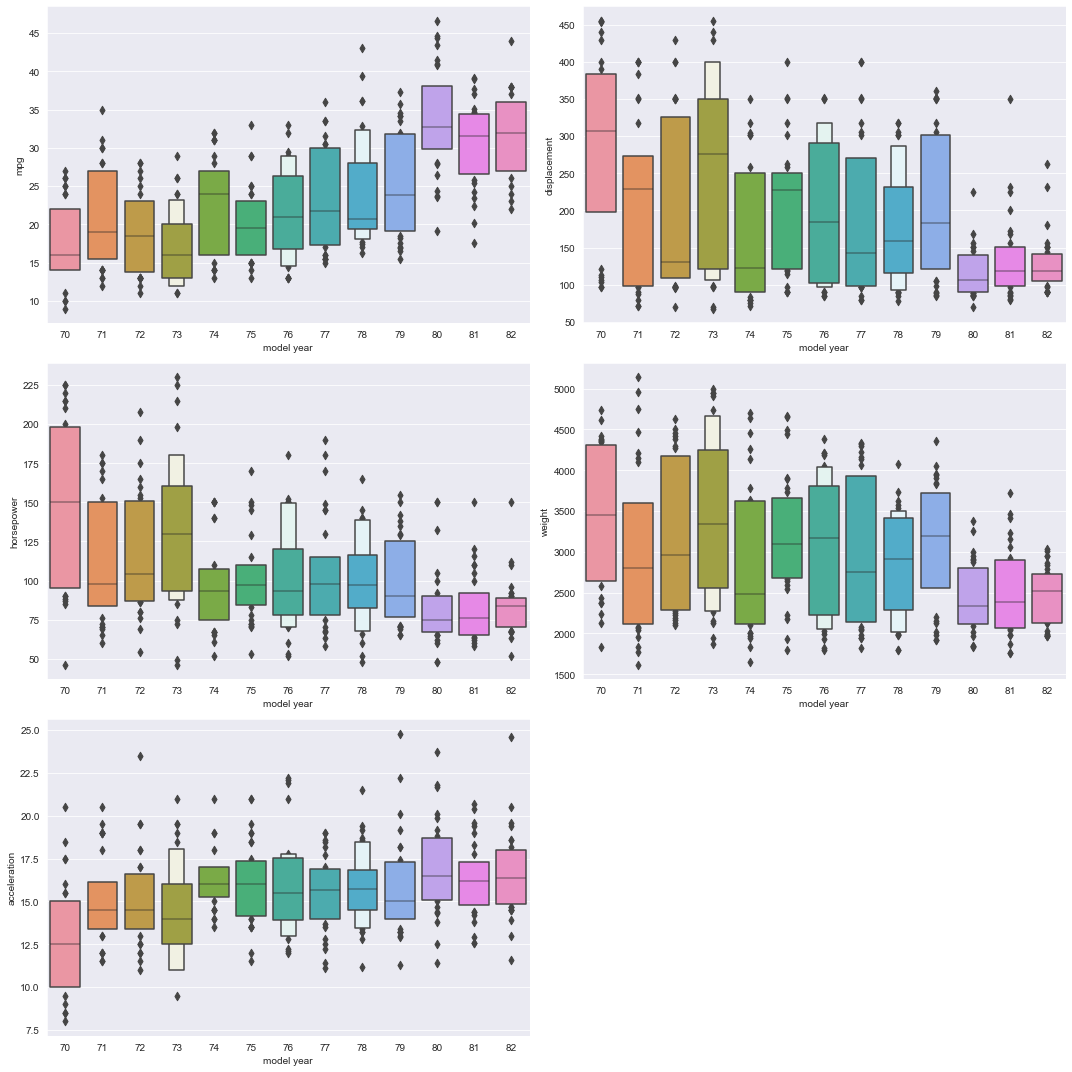

In [255]:
print('Relationship between Model Year and Numerical Features')
fig = plt.figure(1, (15,15))

for i,category in enumerate(numerics):
    ax = plt.subplot(3,2,i+1)
    sns.boxenplot(x='model year', y=category, data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()

Relationship between Model Year and Numerical Features


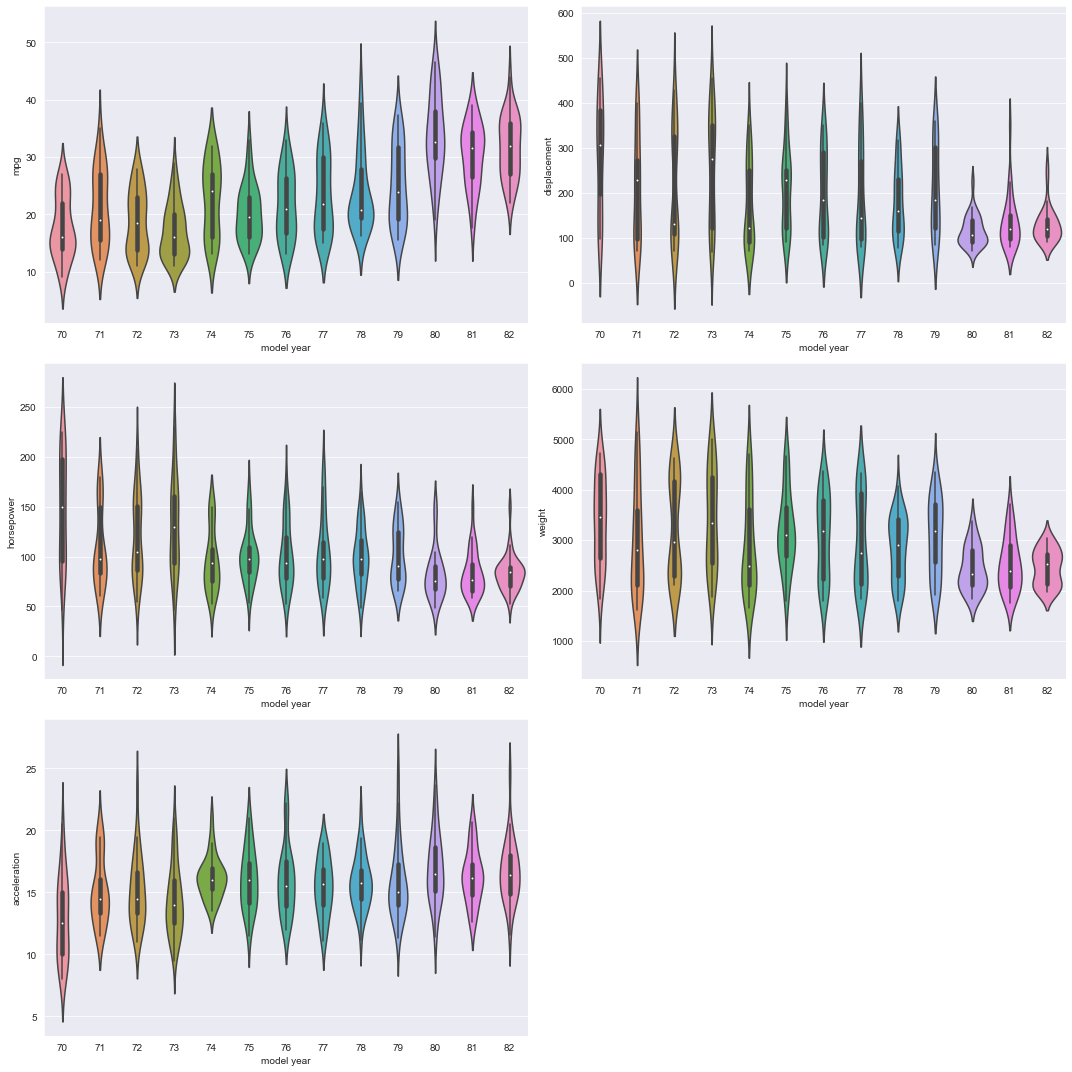

In [262]:
print('Relationship between Model Year and Numerical Features')
fig = plt.figure(1, (15,15))

for i,category in enumerate(numerics):
    ax = plt.subplot(3,2,i+1)
    sns.violinplot(x='model year', y=category, data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()

Relationship between Model Year and Numerical Features Split by Origin


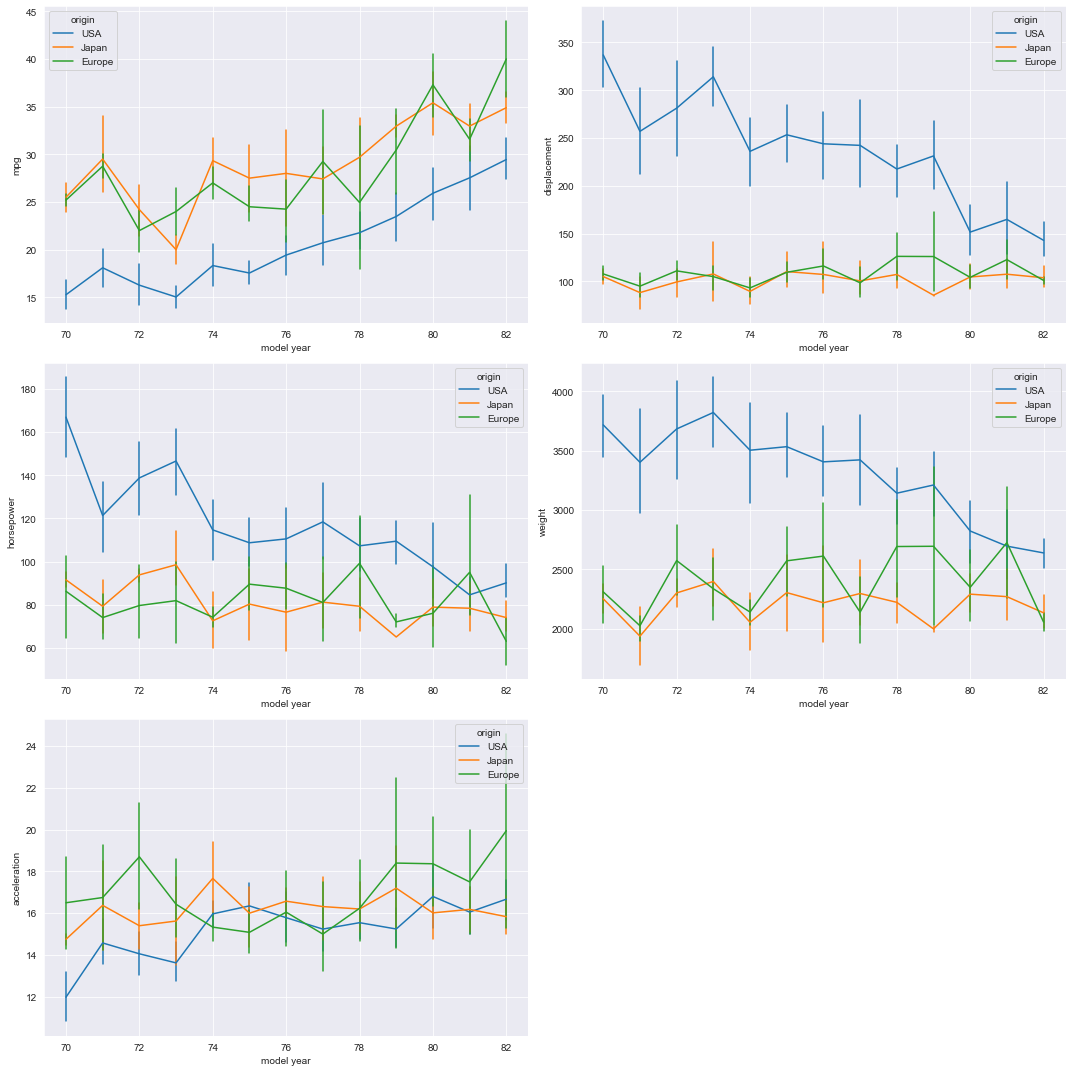

In [260]:
print('Relationship between Model Year and Numerical Features Split by Origin')
fig = plt.figure(1, (15,15))

for i,category in enumerate(numerics):
    ax = plt.subplot(3,2,i+1)
    sns.lineplot(x='model year', y=category, hue='origin', data=train, err_style='bars')
    plt.tight_layout()

In [265]:
# Here we can see the relationship between origin, numerical features as the years pile up